# Using ML/AI for Music Genre Classification

## Dataset
Using the GTZAN Dataset from Kaggle for Music Genre Classification through Deep Learning Models and Machine Learning Algorithms.

Link to the dataset : https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import json
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
import random

## Reading CSV File into a Pandas Dataframe

In [ ]:
df_3_sec = pd.read_csv('/content/drive/MyDrive/archive/Data/features_3_sec.csv')
df_3_sec.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

## Describing Data

In [ ]:
df_3_sec.shape

(9990, 60)

In [ ]:
df_3_sec.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [ ]:
# Dropping column filename as it is not required
df_3_sec=df_3_sec.drop(labels='filename', axis=1)

## Audio Files Details

In [ ]:
audio_recording = ("/content/drive/MyDrive/archive/Data/genres_original/country/country.00050.wav")
data, sr = librosa.load(audio_recording)
print(type(data), type(sr))
data, sr = librosa.load(audio_recording)
librosa.load(audio_recording, sr=45600)

<class 'numpy.ndarray'> <class 'int'>


(array([ 0.04446704,  0.06373047,  0.05768819, ..., -0.13878524,
        -0.11868108, -0.05903753], dtype=float32),
 45600)

### Playing Audio Files in Notebook using IPython

In [ ]:
import IPython
IPython.display.Audio(data, rate=sr)

## Visualising Audio Files

#### 1. Plotting RAW Waveform
Waveforms are visual representations of sound as time on the x-axis and amplitude on the y-axis.

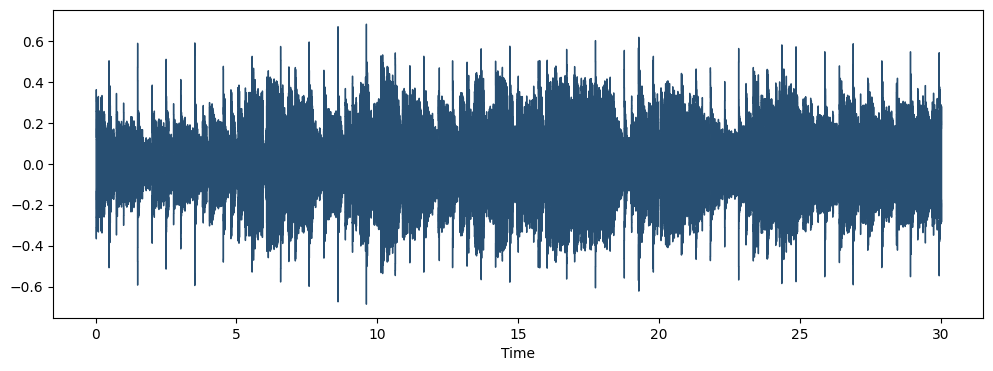

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, color="#284F72")
plt.show()

#### 2. Spectrograms
A spectrogram is a visual way of representing the signal loudness of a signal over time at various frequencies present in a particular waveform.
In 2-dimensional arrays, the first axis is frequency while the second axis is time.

<ipython-input-16-8e33a744559d>:4: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='hz')


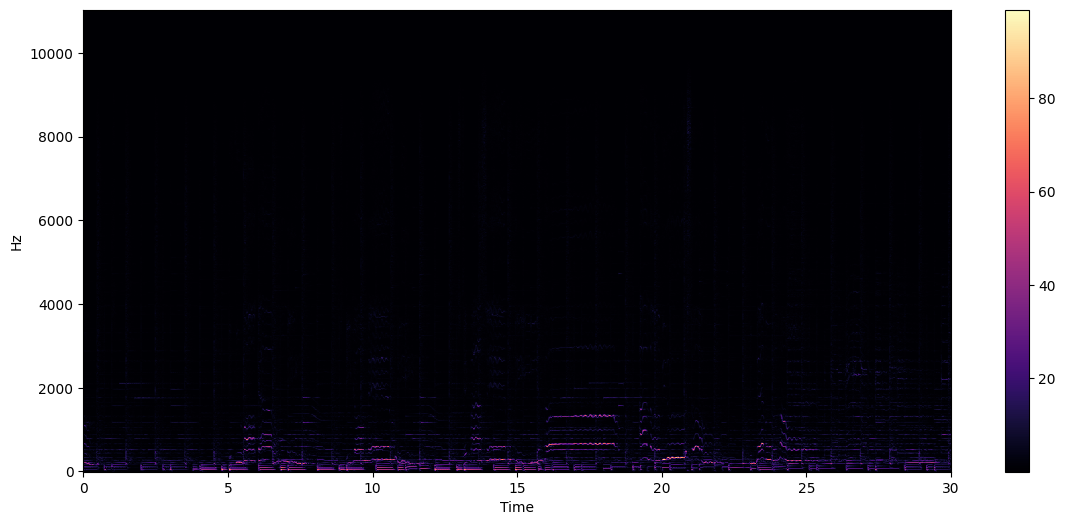

In [ ]:
stft = librosa.stft(data)
plt.figure(figsize=(14, 6))
stft_db = librosa.amplitude_to_db(abs(stft))
librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

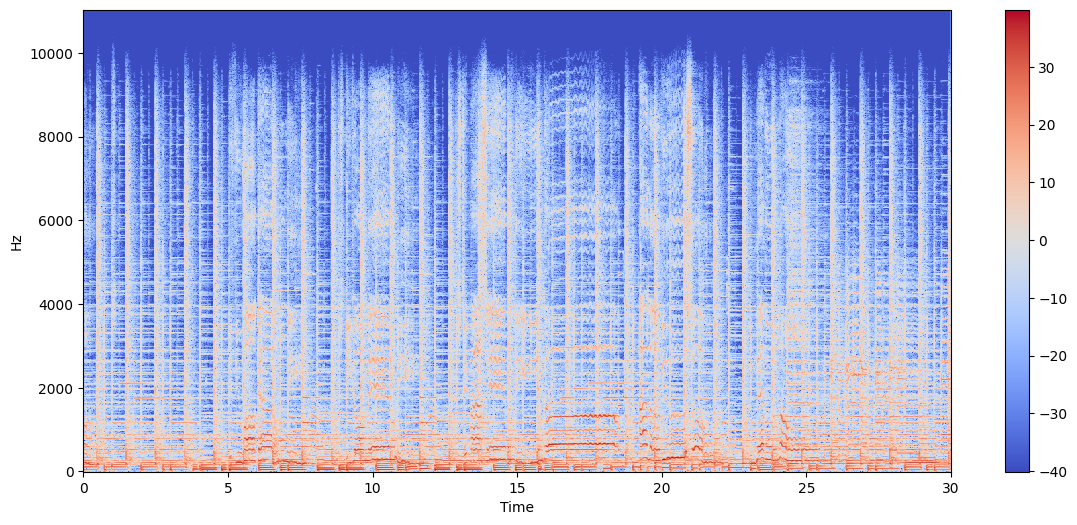

In [ ]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 6))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

The vertical axis represents frequencies (from 0 to 10kHz), and the horizontal axis represents the time of the clip.

#### 3. Spectral Rolloff
Spectral Rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.

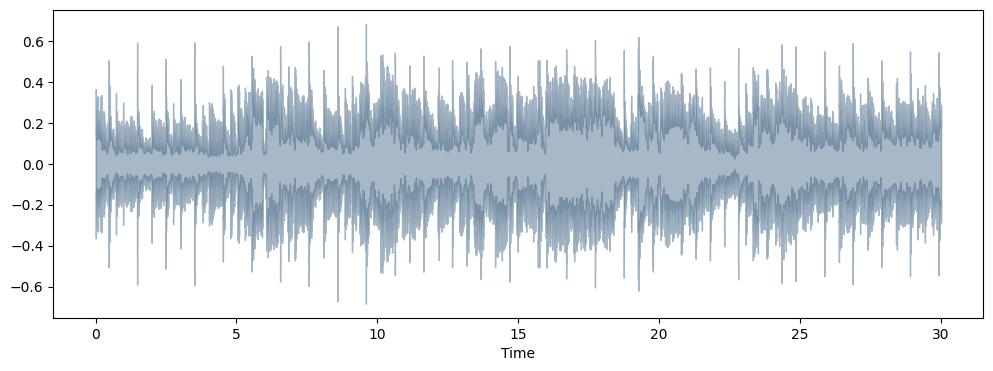

In [ ]:
from sklearn.preprocessing import normalize
spectral_rolloff = librosa.feature.spectral_rolloff(y=data+0.01, sr=sr) [0]
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sr, alpha=0.4, color="#284F72")

#### 4. Chroma Feature
It is a powerful tool for analyzing music features whose pitches can be meaningfully categorized and whose tuning approximates to the equal-tempered scale. One main property of chroma features is that they capture harmonic and melodic characteristics of music while being robust to changes in timbre and instrumentation.

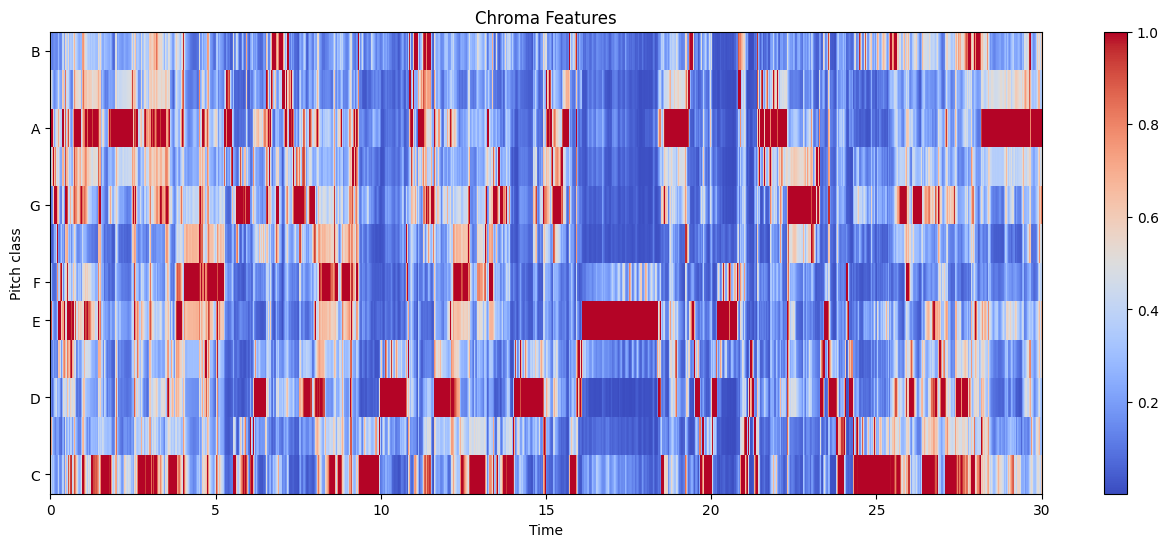

In [ ]:
import librosa.display as lplt
chroma= librosa.feature.chroma_stft(y=data, sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis= 'chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

#### 5. Zero Crossing Rate
Zero crossing is said to occur if successive samples have different algebraic signs. The rate at which zero-crossings occur is a simple measure of the frequency content of a signal. Zero-crossing rate is a measure of the number of times in a given time interval/frame that the amplitude of the speech signals passes through a value of zero.

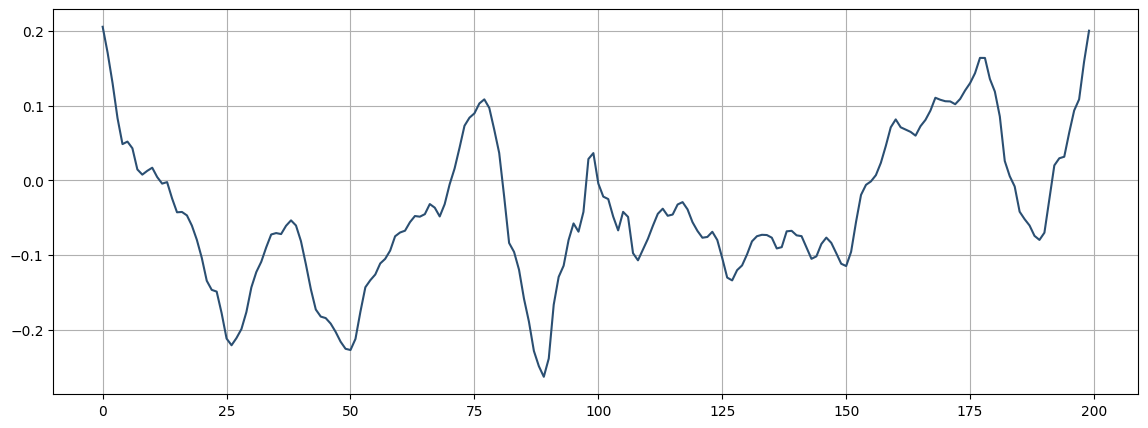

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(data[1000:1200], color="#2B4F72")
plt.grid()

#### Count of zero crossings in the audio

In [ ]:
zero_cross_rate = librosa.zero_crossings(data[1000:1200], pad=False)
print("The number of zero-crossings is",sum(zero_cross_rate))

The number of zero-crossings is 8


## Extracting Data

In [ ]:
class_list = df_3_sec.iloc[:, -1]
encoder = LabelEncoder()

In [ ]:
y_3_sec = encoder.fit_transform(class_list)

In [ ]:
y_3_sec

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
print(df_3_sec.iloc[:, :-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

## Scaling Data Features

In [ ]:
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
x_3_sec = fit.fit_transform(np.array(df_3_sec.iloc[:, :-1], dtype = float))

## Dividing Data into Train and Test Sets

In [ ]:
x_train_3_sec, x_test_3_sec, y_train_3_sec, y_test_3_sec = train_test_split(x_3_sec, y_3_sec, test_size=0.33)

# CNN Model

## For 3 second Audio Clips Dataset

In [ ]:
#from keras.wrappers.scikit learn import KerasClassifier
from keras.models import Sequential

def trainModel (model, epochs, optimizer):
  batch_size = 128
  #callback myCallback()
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
  return model.fit(x_train_3_sec, y_train_3_sec, validation_data=(x_test_3_sec, y_test_3_sec), epochs=epochs, batch_size=batch_size)

def plotValidate(history):
  print("Validation Accuracy",max(history.history["val_accuracy"]))
  pd.DataFrame(history.history).plot(figsize=(12,6))
  plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               30208     
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 64)               

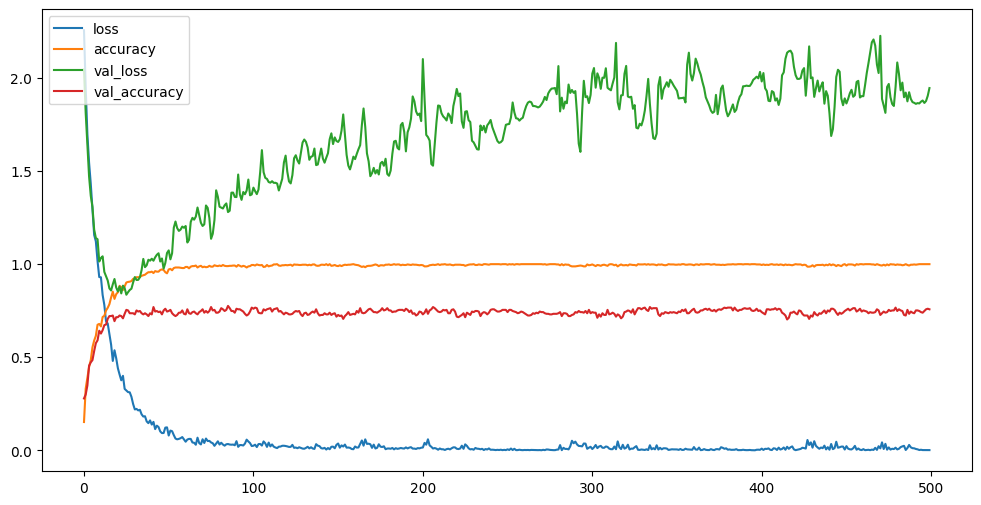

In [ ]:
model_3_sec = keras.models.Sequential([
keras.layers.Dense(512, activation='relu', input_shape=(x_train_3_sec.shape[1],)),
keras.layers.Dropout(0.2),

keras.layers.Dense(256, activation='relu'),
keras.layers.Dropout(0.2),

keras.layers.Dense (128, activation='relu'),
keras.layers. Dropout(0.2),

keras.layers.Dense (64, activation='relu'),
keras.layers.Dropout(0.2),

keras.layers.Dense(10, activation='softmax'),
])

print(model_3_sec.summary())
model_history_3_sec = trainModel (model=model_3_sec, epochs=500, optimizer='adam')
plotValidate(model_history_3_sec)

## Model Evaluation

In [ ]:
test_loss_3_sec, test_acc_3_sec = model_3_sec.evaluate(x_test_3_sec, y_test_3_sec, batch_size=128)
print("Test Loss :", test_loss_3_sec)
print("\nBest Test Accuracy :",test_acc_3_sec*100)

26/26 [==============================] - 0s 3ms/step - loss: 1.7043 - accuracy: 0.7716
Test Loss : 1.7042748928070068

Best Test Accuracy : 77.16105580329895


## For 30 second Audio Clips Dataset

In [ ]:
df_30_sec = pd.read_csv('/content/drive/MyDrive/archive/Data/features_30_sec.csv')

In [ ]:
# Dropping column filename as it is not required
df_30_sec=df_30_sec.drop(labels='filename', axis=1)

In [ ]:
class_list = df_30_sec.iloc[:, -1]

In [ ]:
y_30_sec = encoder.fit_transform(class_list)

In [ ]:
x_30_sec = fit.fit_transform(np.array(df_30_sec.iloc[:, :-1], dtype = float))

In [ ]:
x_train_30_sec, x_test_30_sec, y_train_30_sec, y_test_30_sec = train_test_split(x_30_sec, y_30_sec, test_size=0.33)

In [ ]:
def trainModel (model, epochs, optimizer):
  batch_size = 128
  #callback myCallback()
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
  return model.fit(x_train_30_sec, y_train_30_sec, validation_data=(x_test_30_sec, y_test_30_sec), epochs=epochs, batch_size=batch_size)

def plotValidate(history):
  print("Validation Accuracy",max(history.history["val_accuracy"]))
  pd.DataFrame(history.history).plot(figsize=(12,6))
  plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               30208     
                                                                 
 dropout_16 (Dropout)        (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 64)               

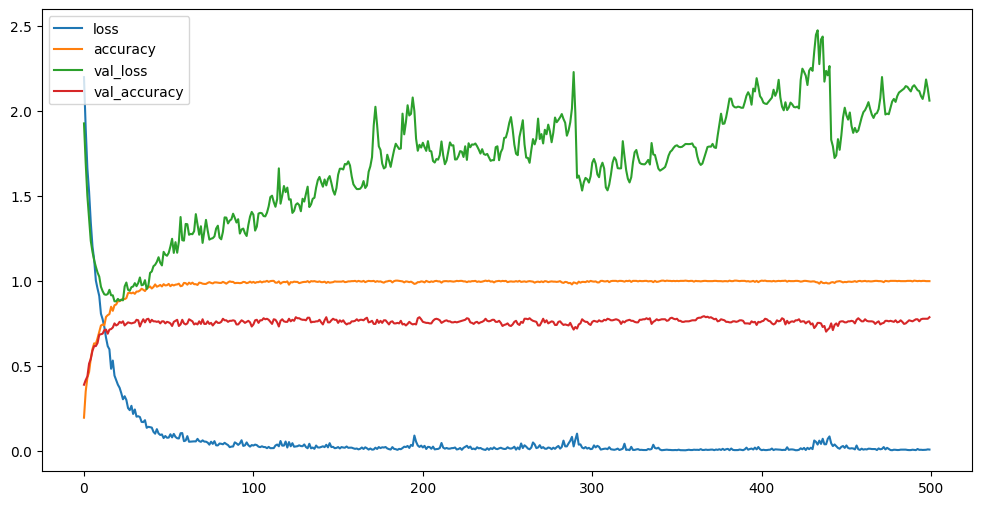

In [ ]:
model_30_sec = keras.models.Sequential([
keras.layers.Dense(512, activation='relu', input_shape=(x_train_30_sec.shape[1],)),
keras.layers.Dropout(0.2),

keras.layers.Dense(256, activation='relu'),
keras.layers.Dropout (0.2),

keras.layers.Dense(128, activation='relu'),
keras.layers.Dropout(0.2),

keras.layers.Dense(64, activation='relu'),
keras.layers.Dropout (0.2),

keras.layers.Dense(10, activation='softmax'),
])

print(model_30_sec.summary())
model_history_30_sec = trainModel (model=model_30_sec, epochs=500, optimizer='adam')
plotValidate(model_history_30_sec)

In [ ]:
test_loss_30_sec, test_acc_30_sec = model_30_sec.evaluate(x_test_30_sec, y_test_30_sec, batch_size=128)
print("Test Loss :", test_loss_30_sec)
print("\nBest Test Accuracy :",test_acc_30_sec*100)

3/3 [==============================] - 0s 6ms/step - loss: 2.0586 - accuracy: 0.7848
Test Loss : 2.058586835861206

Best Test Accuracy : 78.48485112190247


## SVM ON 3 SEC AUDIOCLIPS

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(x_train_3_sec, y_train_3_sec)
#Predicting the test set result
y_pred_3_sec = classifier.predict(x_test_3_sec)
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test_3_sec, y_pred_3_sec)
ac=accuracy_score(y_test_3_sec, y_pred_3_sec)


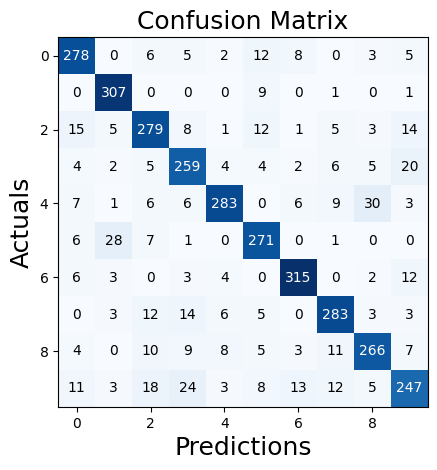

Accuracy is: 0.8456172277828329


In [ ]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print("Accuracy is:",ac)

## SVM ON 30 SEC AUDIOCLIPS

In [ ]:
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(x_train_30_sec, y_train_30_sec)
#Predicting the test set result
y_pred_30_sec= classifier.predict(x_test_30_sec)
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm1= confusion_matrix(y_test_30_sec, y_pred_30_sec)
ac1=accuracy_score(y_test_30_sec, y_pred_30_sec)

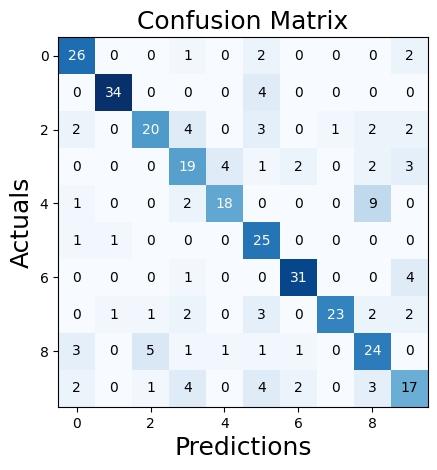

Accuracy is: 0.7181818181818181


In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=cm1, cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print("Accuracy is:",ac1)

# Creating AI Model to predict any song file

In [ ]:
example_file = "Data\genres_original\disco\disco.00001.wav"

In [ ]:
# load audio file with Librosa
signal, sample_rate = librosa.load(example_file)

In [ ]:
print(signal)

[-0.18777466 -0.23693848 -0.15542603 ...  0.03741455  0.10574341
  0.09619141]


In [ ]:
print(sample_rate)

22050


In [ ]:
FIG_SIZE = (16,8)

Text(0.5, 1.0, 'Waveform')

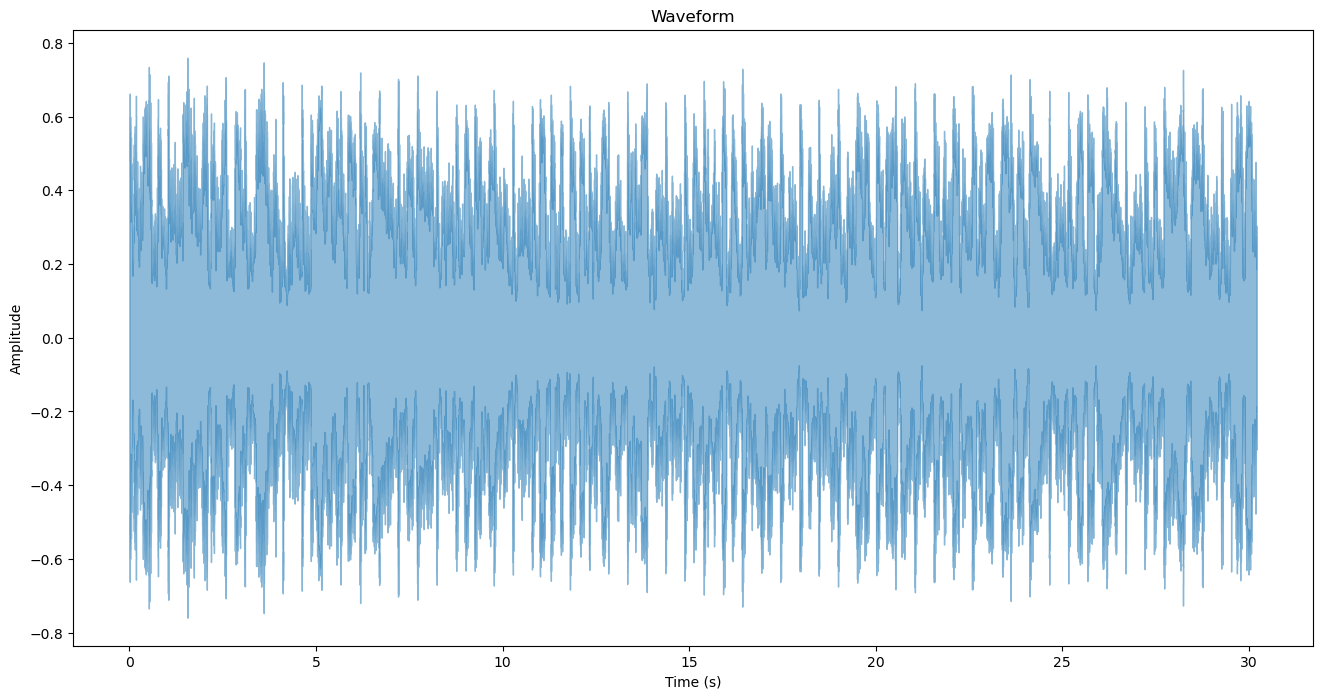

In [ ]:
# WAVEFORM
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal, sr = sample_rate, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [ ]:
# Fourier Transform (FFT) - Frequency Domain
fft = np.fft.fft(signal)

In [ ]:
# Calculate the Magnitude (abs values on complex numbers)
spectrum = np.abs(fft)

In [ ]:
# Create the Frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

Text(0.5, 1.0, 'Power Spectrum')

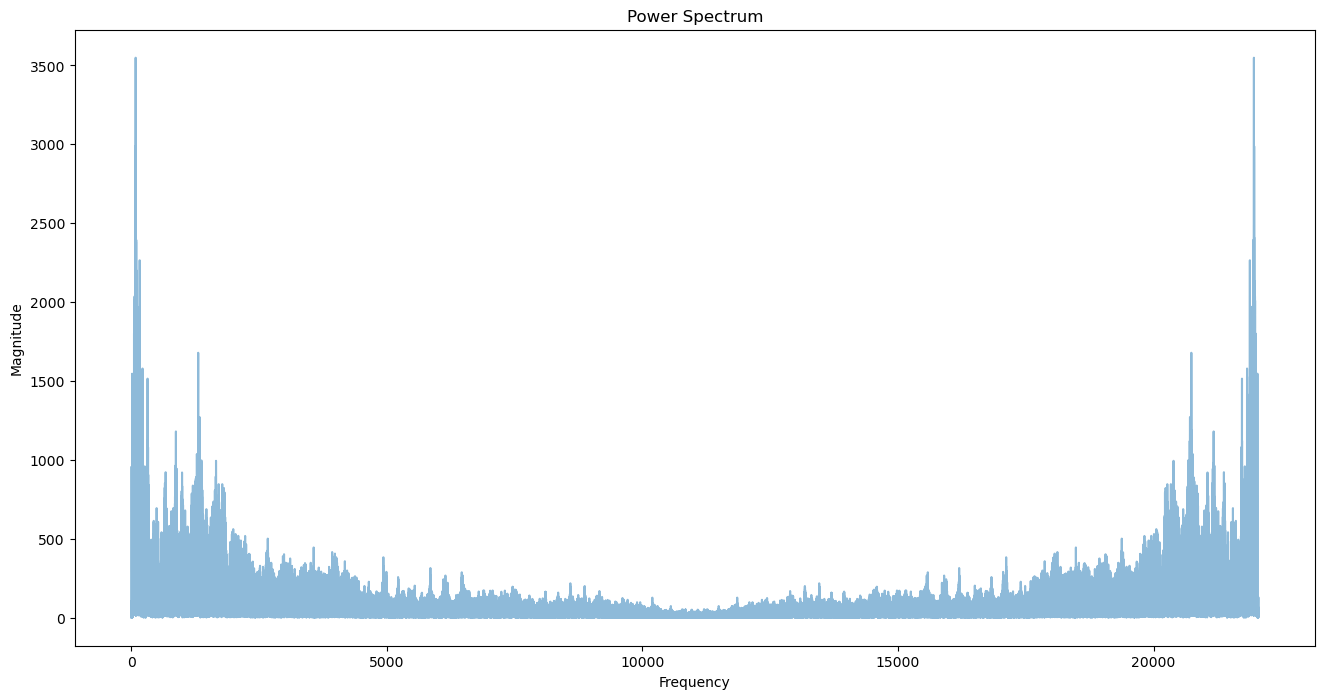

In [ ]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(f, spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [ ]:
# Take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

Text(0.5, 1.0, 'Power Spectrum')

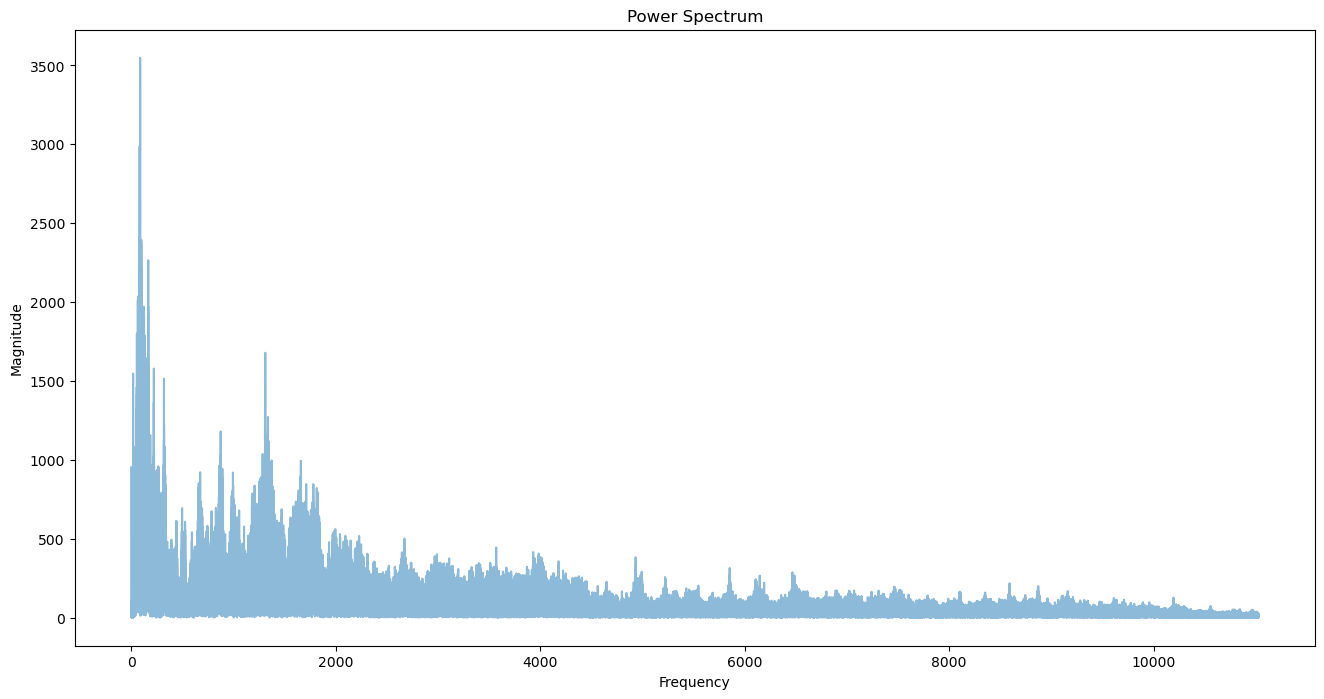

In [ ]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [ ]:
# Spectrogram (STFT)
hop_length = 512 # num. of samples
n_fft = 2048 # num. of samples for window

In [ ]:
# Perform STFT
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

In [ ]:
# Calculate the Magnitude (abs values on complex numbers)
spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

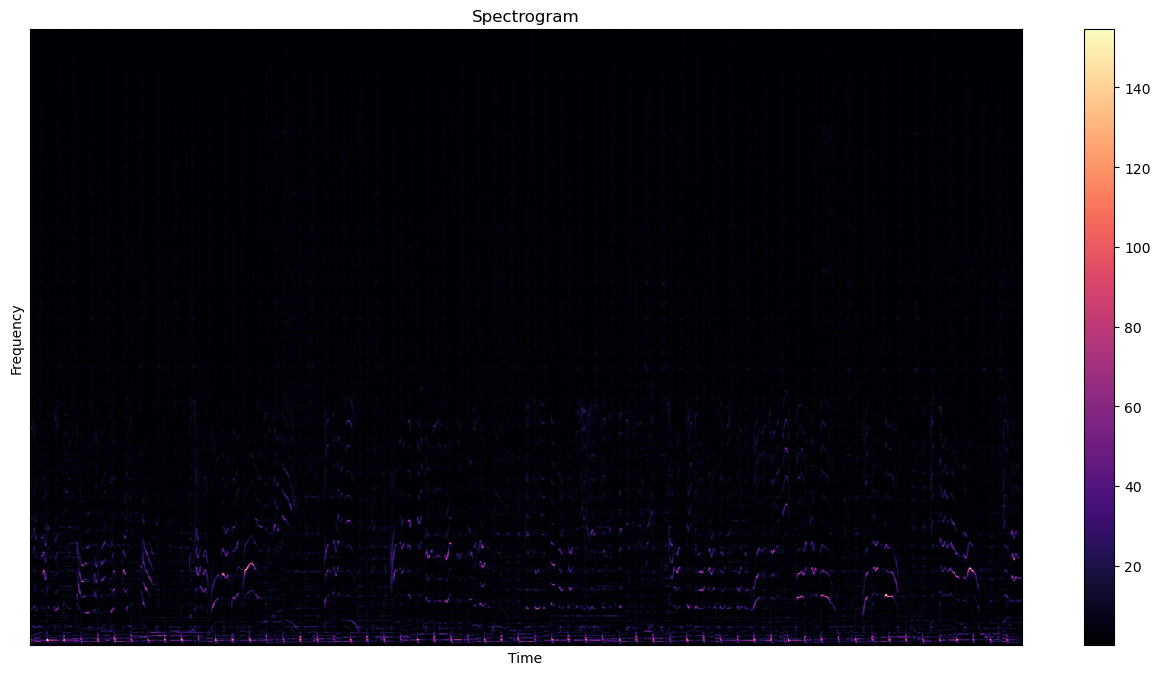

In [ ]:
# Plot the Spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

In [ ]:
# Apply Logarithm to get values in Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

Text(0.5, 1.0, 'Spectrogram (dB)')

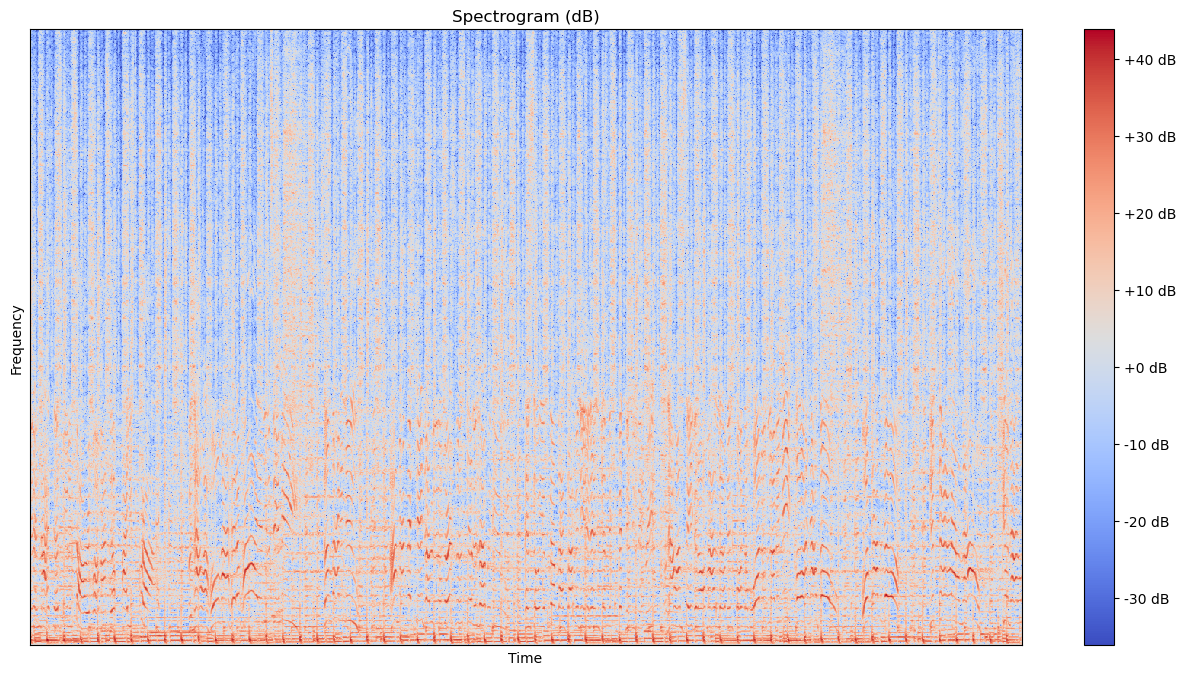

In [ ]:
# Plot the Spectrogram in Decibels
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [ ]:
# MFCCs (we use 13 MFCCs)
MFCCs = librosa.feature.mfcc(y=signal, sr= sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

Text(0.5, 1.0, 'MFCCs')

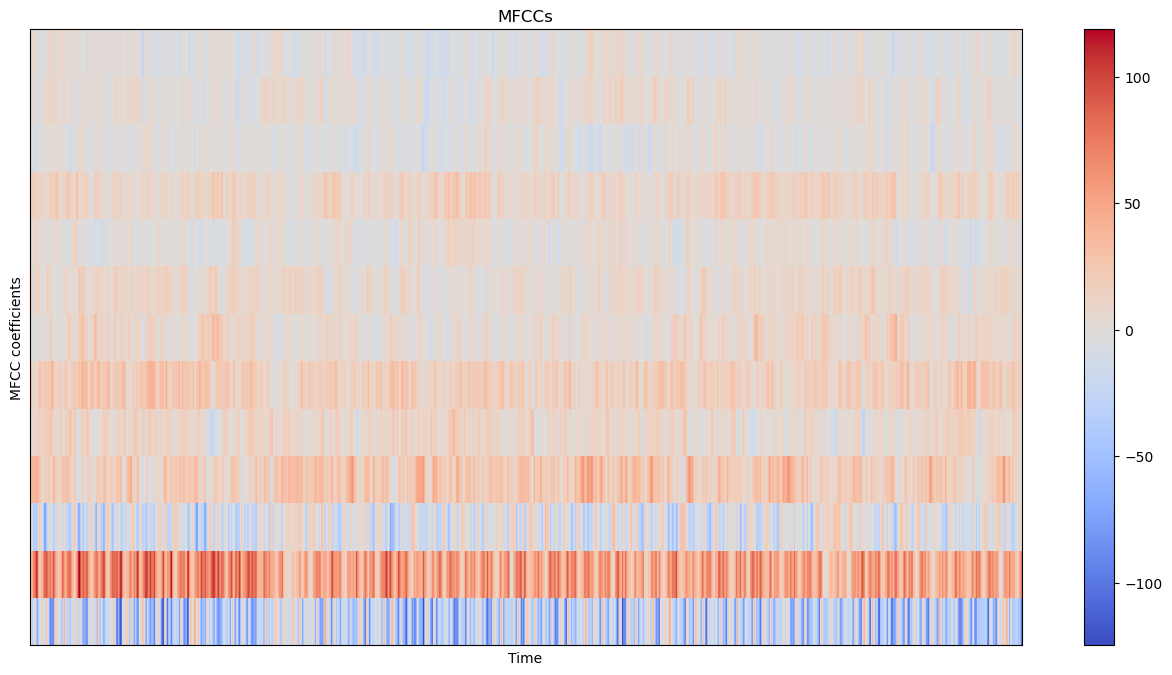

In [ ]:
# Plot MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

In [ ]:
DATASET_PATH = "Data\genres_original"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [ ]:
def save_mfcc(dataset_path, json_path, n_mfcc=13, n_fft=2048,
             hop_length=512, num_segments=5):
    # Data storage dictionary
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": [],
    }
    samples_ps = int(SAMPLES_PER_TRACK/num_segments) # ps = per segment
    expected_vects_ps = math.ceil(samples_ps/hop_length)

    # loop through all the genres
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        # ensuring not at root
        if dirpath is not dataset_path:
            # save the semantic label
            dirpath_comp = dirpath.split("/")
            semantic_label = dirpath_comp[-1]
            data["mapping"].append(semantic_label)
            print(f"Processing: {semantic_label}")

            # process files for specific genre
            for f in filenames:
                if(f==str("jazz.00054.wav")):
                    # As librosa only read files <1Mb
                    continue
                else:
                    # load audio file
                    file_path = os.path.join(dirpath, f)
                    signal,sr = librosa.load(file_path,sr=SAMPLE_RATE)
                    for s in range(num_segments):
                        start_sample = samples_ps * s
                        finish_sample = start_sample + samples_ps

                        mfcc = librosa.feature.mfcc(y= signal[start_sample:finish_sample],
                                                    sr = sr,
                                                    n_fft = n_fft,
                                                    n_mfcc = n_mfcc,
                                                    hop_length = hop_length)

                        mfcc = mfcc.T

                        # store mfcc if it has expected length
                        if len(mfcc)==expected_vects_ps:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i-1)
                            print(f"{file_path}, segment: {s+1}")

    with open(json_path,"w") as f:
        json.dump(data,f,indent=4)

In [ ]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)

Processing: Data\genres_original\blues
Data\genres_original\blues\blues.00000.wav, segment: 1
Data\genres_original\blues\blues.00000.wav, segment: 2
Data\genres_original\blues\blues.00000.wav, segment: 3
Data\genres_original\blues\blues.00000.wav, segment: 4
Data\genres_original\blues\blues.00000.wav, segment: 5
Data\genres_original\blues\blues.00000.wav, segment: 6
Data\genres_original\blues\blues.00000.wav, segment: 7
Data\genres_original\blues\blues.00000.wav, segment: 8
Data\genres_original\blues\blues.00000.wav, segment: 9
Data\genres_original\blues\blues.00000.wav, segment: 10
Data\genres_original\blues\blues.00001.wav, segment: 1
Data\genres_original\blues\blues.00001.wav, segment: 2
Data\genres_original\blues\blues.00001.wav, segment: 3
Data\genres_original\blues\blues.00001.wav, segment: 4
Data\genres_original\blues\blues.00001.wav, segment: 5
Data\genres_original\blues\blues.00001.wav, segment: 6
Data\genres_original\blues\blues.00001.wav, segment: 7
Data\genres_original\blue

### Load Data

In [ ]:
# path to json
DATA_PATH = "data_10.json"

In [ ]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [ ]:
# load data
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [ ]:
X.shape

(9986, 130, 13)

In [ ]:
# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Simple ANN

In [ ]:
# build network topology
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 1690)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               865792    
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 1014218 (3.87 MB)
Trainable params: 1014218 (3.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Epoch 1/50
219/219 [==============================] - 4s 14ms/step - loss: 8.5576 - accuracy: 0.3083 - val_loss: 4.2772 - val_accuracy: 0.3915
Epoch 2/50
219/219 [==============================] - 3s 13ms/step - loss: 3.2630 - accuracy: 0.4097 - val_loss: 3.1264 - val_accuracy: 0.4005
Epoch 3/50
219/219 [==============================] - 3s 13ms/step - loss: 2.2723 - accuracy: 0.4638 - val_loss: 2.8356 - val_accuracy: 0.3999
Epoch 4/50
219/219 [==============================] - 3s 13ms/step - loss: 1.8150 - accuracy: 0.5031 - val_loss: 2.3545 - val_accuracy: 0.4115
Epoch 5/50
219/219 [==============================] - 3s 13ms/step - loss: 1.4603 - accuracy: 0.5574 - val_loss: 2.3434 - val_accuracy: 0.4292
Epoch 6/50
219/219 [==============================] - 3s 13ms/step - loss: 1.3475 - accuracy: 0.5847 - val_loss: 2.0989 - val_accuracy: 0.4616
Epoch 7/50
219/219 [==============================] - 3s 13ms/step - loss: 1.1743 - accuracy: 0.6330 - val_loss: 2.0952 - val_accuracy: 0.4606

In [ ]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

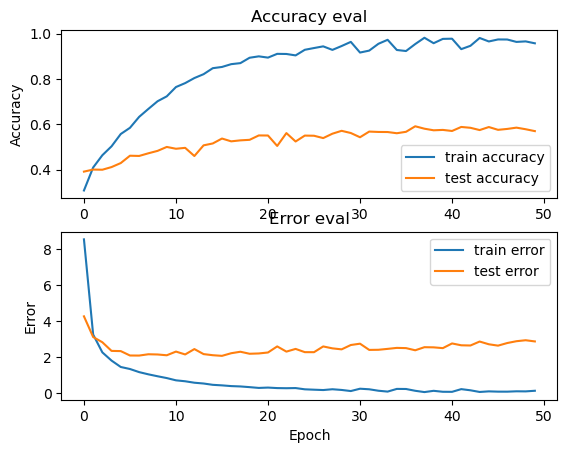

In [ ]:
# plot accuracy and error as a function of the epochs
plot_history(history)

### Managing Overfitting

In [ ]:
# build network topology
model_regularized = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_regularized.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# train model
history = model_regularized.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
219/219 [==============================] - 4s 15ms/step - loss: 23.3932 - accuracy: 0.1534 - val_loss: 3.5517 - val_accuracy: 0.2223
Epoch 2/100
219/219 [==============================] - 3s 14ms/step - loss: 6.6037 - accuracy: 0.1692 - val_loss: 3.4023 - val_accuracy: 0.1956
Epoch 3/100
219/219 [==============================] - 3s 14ms/step - loss: 4.5376 - accuracy: 0.1535 - val_loss: 3.4302 - val_accuracy: 0.1712
Epoch 4/100
219/219 [==============================] - 4s 16ms/step - loss: 3.9484 - accuracy: 0.1413 - val_loss: 3.4238 - val_accuracy: 0.1652
Epoch 5/100
219/219 [==============================] - 3s 15ms/step - loss: 3.7414 - accuracy: 0.1413 - val_loss: 3.4377 - val_accuracy: 0.1559
Epoch 6/100
219/219 [==============================] - 3s 15ms/step - loss: 3.6244 - accuracy: 0.1464 - val_loss: 3.4265 - val_accuracy: 0.1649
Epoch 7/100
219/219 [==============================] - 3s 15ms/step - loss: 3.5360 - accuracy: 0.1466 - val_loss: 3.4013 - val_accuracy

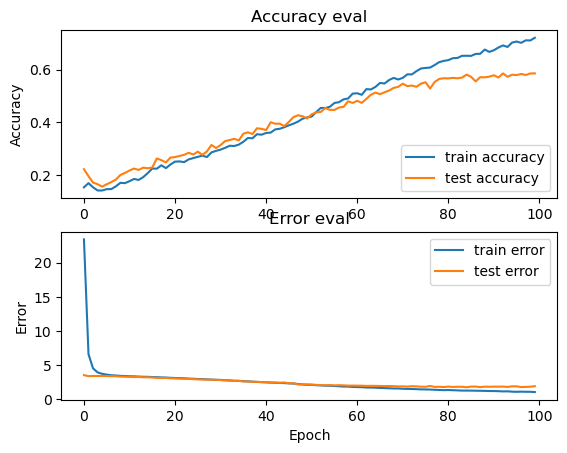

In [ ]:
# plot accuracy and error as a function of the epochs
plot_history(history)

# Convolutional Neural Network

In [ ]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
X_train.shape

(5991, 130, 13, 1)

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [ ]:
# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 6, 32)         0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 64, 6, 32)         128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 2, 32)         0         
 g2D)                                                            
                                                      

In [ ]:
# train model
history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

Epoch 1/50
188/188 [==============================] - 7s 31ms/step - loss: 2.3005 - accuracy: 0.2467 - val_loss: 1.8479 - val_accuracy: 0.3445
Epoch 2/50
188/188 [==============================] - 5s 29ms/step - loss: 1.7832 - accuracy: 0.3799 - val_loss: 1.5204 - val_accuracy: 0.4720
Epoch 3/50
188/188 [==============================] - 5s 29ms/step - loss: 1.6077 - accuracy: 0.4338 - val_loss: 1.4099 - val_accuracy: 0.5134
Epoch 4/50
188/188 [==============================] - 5s 28ms/step - loss: 1.4955 - accuracy: 0.4645 - val_loss: 1.3187 - val_accuracy: 0.5347
Epoch 5/50
188/188 [==============================] - 5s 29ms/step - loss: 1.4117 - accuracy: 0.4997 - val_loss: 1.2568 - val_accuracy: 0.5621
Epoch 6/50
188/188 [==============================] - 5s 28ms/step - loss: 1.3540 - accuracy: 0.5133 - val_loss: 1.1895 - val_accuracy: 0.5781
Epoch 7/50
188/188 [==============================] - 5s 28ms/step - loss: 1.2861 - accuracy: 0.5388 - val_loss: 1.1572 - val_accuracy: 0.5908

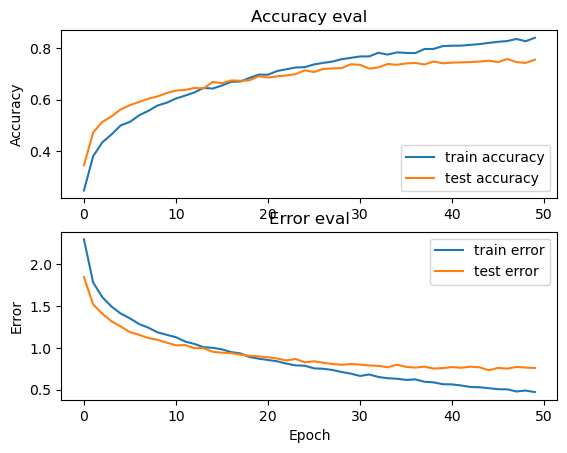

In [ ]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [ ]:
# evaluate model on Test Set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 1s - loss: 0.7826 - accuracy: 0.7341 - 683ms/epoch - 9ms/step

Test accuracy: 0.7340809106826782


In [ ]:
model_cnn.save("Music_Genre_10_CNN")

INFO:tensorflow:Assets written to: Music_Genre_10_CNN\assets


INFO:tensorflow:Assets written to: Music_Genre_10_CNN\assets


In [ ]:
model_cnn.save("Music_Genre_10_CNN.h5")

c:\Users\neeta\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("Music_Genre_10_CNN.h5")

### Prediction on Test Set

In [ ]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

In [ ]:
X_to_predict.shape

(130, 13, 1)

In [ ]:
print("Real Genre:", y_to_predict)

Real Genre: 3


In [ ]:
# add a dimension to input data for sample - model.predict() expects a 4d array in this case
X_to_predict = X_to_predict[np.newaxis, ...] # array shape (1, 130, 13, 1)

In [ ]:
X_to_predict.shape

(1, 130, 13, 1)

In [ ]:
# perform prediction
prediction = model_cnn.predict(X_to_predict)

1/1 [==============================] - 0s 162ms/step


In [ ]:
# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Predicted Genre: 3


In [ ]:
# pick a sample to predict from the test set
X_to_predict = X_test[50]
y_to_predict = y_test[50]

print("Real Genre:", y_to_predict)

X_to_predict = X_to_predict[np.newaxis, ...]

prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))





Real Genre: 2
1/1 [==============================] - 0s 24ms/step
Predicted Genre: 2


In [ ]:
len(X_test)

2497

In [ ]:
for n in range(10):

  i = random.randint(0,len(X_test))
  # pick a sample to predict from the test set
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(X_to_predict)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))



Real Genre: 5
1/1 [==============================] - 0s 23ms/step
Predicted Genre: 5

Real Genre: 8
1/1 [==============================] - 0s 21ms/step
Predicted Genre: 8

Real Genre: 5
1/1 [==============================] - 0s 21ms/step
Predicted Genre: 5

Real Genre: 7
1/1 [==============================] - 0s 21ms/step
Predicted Genre: 7

Real Genre: 8
1/1 [==============================] - 0s 23ms/step
Predicted Genre: 8

Real Genre: 0
1/1 [==============================] - 0s 21ms/step
Predicted Genre: 0

Real Genre: 8
1/1 [==============================] - 0s 22ms/step
Predicted Genre: 8

Real Genre: 2
1/1 [==============================] - 0s 22ms/step
Predicted Genre: 5

Real Genre: 2
1/1 [==============================] - 0s 19ms/step
Predicted Genre: 7

Real Genre: 5
1/1 [==============================] - 0s 19ms/step
Predicted Genre: 5


### Prediction on New Songs

In [ ]:
# Audio files pre-processing
def process_input(audio_file, track_duration):

  SAMPLE_RATE = 22050
  NUM_MFCC = 13
  N_FTT=2048
  HOP_LENGTH=512
  TRACK_DURATION = track_duration # measured in seconds
  SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
  NUM_SEGMENTS = 10

  samples_per_segment = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / HOP_LENGTH)

  signal, sample_rate = librosa.load(audio_file, sr=SAMPLE_RATE)

  for d in range(10):

    # calculate start and finish sample for current segment
    start = samples_per_segment * d
    finish = start + samples_per_segment

    # extract mfcc
    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)
    mfcc = mfcc.T

    return mfcc

In [ ]:
genre_dict = {0:"hiphop",1:"country",2:"jazz",3:"classical",4:"metal",5:"pop",6:"rock",7:"blues",8:"reggae",9:"disco"}

In [ ]:
new_input_mfcc = process_input("powerful-rhythmic-uplifting-chorus-30-sec-150839.mp3", 30)

In [ ]:
type(new_input_mfcc)

numpy.ndarray

In [ ]:
new_input_mfcc.shape

(130, 13)

In [ ]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 130, 13, 1)

In [ ]:
prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

1/1 [==============================] - 0s 24ms/step
Predicted Genre: reggae


In [ ]:
new_input_mfcc = process_input("street-dance-pixabay-entry-30-sec-5974.mp3", 30)

In [ ]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 130, 13, 1)

In [ ]:
prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

1/1 [==============================] - 0s 22ms/step
Predicted Genre: pop
